# Gini index

Mar. 10, 2019

The Gini index is typically used for categorical attributes to measure their discriminative power.

Let $v_1, v_2, \dots, v_r$ be the $r$ possible values of a particular categorical attribute. Let $p_j$ be the fraction of data points containing attribute of value $v_i$ that belongs to the class $j \in \{1, 2, \dots, k\}$ for the attribute  $v_i$.

The Gini index $G(v_i)$ is defined as follows:

$$G(v_i) = 1 - \sum_{j=1}^k p_j^2$$

When the different classes are distributed evenly for a particular attribute value, the value of Gini index is $1 - 1/k$. If all data points for an attribute value $v_i$ belong to the same class, then the Gini index is 0. Lower values of the Gini index imply greater discrimination.

The value-specific Gini index is converted into an attributewise Gini index. Let $n_i$ be the number of data points that take on the value $v_i$ for an attribute. Then, for a dataset containing $\sum_{i=1}^n n_i = n$ data points, the overall Gini index $G$ for the attribute is defined as the weighted average over the different attribute value as follows:

$$G= \frac{1}{n} \sum_{i=1}^r n_i G(v_i)$$

**References:**

* Aggarwal, C. C. (2015). _Data mining: the textbook_. Switzerland: Springer. pp. 289-290


As an example, the [adult dataset](http://archive.ics.uci.edu/ml/datasets/Adult) from UCI Machine Learning Repository will be used.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Workin with the adult dataset
data = pd.read_csv('datasets/adult/adult.csv')
print(data.shape)

(32561, 15)


In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
def gini_per_value(data, attribute):
    """
    This function calculates gini index for each value
    contained in a categorical attribute related with
    the output labels.
    """
    g = {}
    v = data[attribute].unique()
    for v_i in v:
        freq = data[data[attribute] == v_i]['label'].value_counts()
        p = freq / freq.sum()
        g_i = 1 - np.square(p).sum()
        g[v_i] = g_i
    return g

In [5]:
gini_per_value(data, 'education')

{' Bachelors': 0.48546575057038055,
 ' HS-grad': 0.26813123787640225,
 ' 11th': 0.09691263014938878,
 ' Masters': 0.4935957441720009,
 ' 9th': 0.09953973565080476,
 ' Some-college': 0.3080907142899201,
 ' Assoc-acdm': 0.37335450759735056,
 ' Assoc-voc': 0.38596404883126234,
 ' 7th-8th': 0.11617095917721831,
 ' Doctorate': 0.38391501386535665,
 ' Prof-school': 0.39013671875,
 ' 5th-6th': 0.09147886625364099,
 ' 10th': 0.12407279127019422,
 ' 1st-4th': 0.06887755102040805,
 ' Preschool': 0.0,
 ' 12th': 0.1408082607512975}

In [6]:
def gini_index(data, attributes):
    """
    This function finds a aggregate Gini
    index for a categorical attribute
    """
    res = {}
    for attrib in attributes:
        v = data[attrib].unique()
        g = gini_per_value(data, attrib)
        n = data[attrib].value_counts()
        N = n.sum()
        n = dict(n)
        G = np.array([n[v_i] * g[v_i] for v_i in v]).sum() / N
        res[attrib] = G
    return res

In [7]:
gini_index(data, ['education'])

{'education': 0.3158982617404577}

In [8]:
categorical_attributes = ['workclass', 'education', 'marital-status',
                'occupation', 'relationship', 'race', 'sex', 'native-country']

In [9]:
ginis = gini_index(data, categorical_attributes)
ginis

{'workclass': 0.3538979444734442,
 'education': 0.3158982617404577,
 'marital-status': 0.2924502737131609,
 'occupation': 0.3203639602064241,
 'relationship': 0.2904139869781749,
 'race': 0.36192458971149577,
 'sex': 0.3485844349969883,
 'native-country': 0.3620783207623509}

In [10]:
ginis_df = pd.DataFrame({'gini': list(ginis.values())}, index=list(ginis.keys()) )
ginis_df.sort_values('gini', inplace=True)

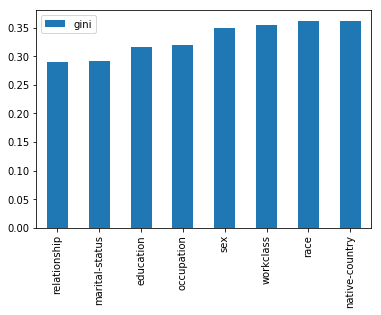

In [11]:
ginis_df.plot(kind='bar')

In conclusion, for this example 'relationship' has the highest discriminative power while 'native-country' has the lowest.